In [13]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

In [33]:
url = 'https://www.worldometers.info/coronavirus/#main_table'
requests.get(url) #Permite determinar si la solicitud es exitosa 

<Response [200]>

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--><html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID Live Update: 228,280,053 Cases and 4,690,999 Deaths from the Coronavirus - Worldometer</title>
<meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x6
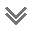

In [34]:
html = requests.get(url).content
soup = BeautifulSoup(html, "lxml")

In [64]:
#rows = soup.select('#main_table_countries_today tbody:nth-child(1) tr:not(.total_row_world )')[1:]
rows = soup.select('#main_table_countries_today tbody:first-of-type tr:not(.total_row_world )')


[<tr style="">
 <td style="font-size:12px;color: grey;text-align:center;vertical-align:middle;">1</td>
 <td style="font-weight: bold; font-size:15px; text-align:left;"><a class="mt_a" href="country/us/">USA</a></td>
 <td style="font-weight: bold; text-align:right">42,747,687</td>
 <td style="font-weight: bold; text-align:right;background-color:#FFEEAA;">+108,685</td>
 <td style="font-weight: bold; text-align:right;">690,166 </td>
 <td style="font-weight: bold; 
                                     text-align:right;background-color:red; color:white">+1,410</td>
 <td style="font-weight: bold; text-align:right">32,393,037</td>
 <td style="font-weight: bold; text-align:right;background-color:#c8e6c9; color:#000">+45,311</td>
 <td style="text-align:right;font-weight:bold;">9,664,484</td>
 <td style="font-weight: bold; text-align:right">25,246</td>
 <td style="font-weight: bold; text-align:right">128,238</td>
 <td style="font-weight: bold; text-align:right">2,070</td>
 <td style="font-weight

In [66]:
countries = [ r.select_one('td:nth-child(2)').text for r in rows]
countries

['USA',
 'India',
 'Brazil',
 'UK',
 'Russia',
 'France',
 'Turkey',
 'Iran',
 'Argentina',
 'Colombia',
 'Spain',
 'Italy',
 'Indonesia',
 'Germany',
 'Mexico',
 'Poland',
 'South Africa',
 'Ukraine',
 'Philippines',
 'Peru',
 'Malaysia',
 'Netherlands',
 'Iraq',
 'Czechia',
 'Japan',
 'Chile',
 'Canada',
 'Bangladesh',
 'Thailand',
 'Pakistan',
 'Belgium',
 'Israel',
 'Sweden',
 'Romania',
 'Portugal',
 'Morocco',
 'Kazakhstan',
 'Serbia',
 'Switzerland',
 'Hungary',
 'Jordan',
 'Cuba',
 'Nepal',
 'UAE',
 'Austria',
 'Tunisia',
 'Vietnam',
 'Greece',
 'Lebanon',
 'Georgia',
 'Saudi Arabia',
 'Guatemala',
 'Belarus',
 'Ecuador',
 'Costa Rica',
 'Sri Lanka',
 'Bolivia',
 'Bulgaria',
 'Azerbaijan',
 'Panama',
 'Paraguay',
 'Myanmar',
 'Kuwait',
 'Slovakia',
 'Croatia',
 'Uruguay',
 'Palestine',
 'Ireland',
 'Honduras',
 'Dominican Republic',
 'Denmark',
 'Venezuela',
 'Ethiopia',
 'Libya',
 'Lithuania',
 'Oman',
 'Egypt',
 'S. Korea',
 'Slovenia',
 'Moldova',
 'Bahrain',
 'Mongolia',
 '

In [68]:
total_cases = [ r.select_one('td:nth-child(3)').text for r in rows]
total_cases

['42,747,687',
 '33,415,889',
 '21,080,219',
 '7,371,301',
 '7,234,425',
 '6,942,105',
 '6,794,700',
 '5,396,013',
 '5,234,851',
 '4,936,052',
 '4,929,546',
 '4,627,699',
 '4,185,144',
 '4,139,009',
 '3,549,229',
 '2,896,599',
 '2,877,063',
 '2,338,164',
 '2,324,475',
 '2,164,380',
 '2,067,327',
 '1,981,252',
 '1,970,746',
 '1,685,435',
 '1,663,024',
 '1,646,403',
 '1,565,769',
 '1,540,110',
 '1,448,792',
 '1,218,749',
 '1,217,473',
 '1,211,443',
 '1,144,982',
 '1,139,505',
 '1,060,432',
 '915,835',
 '854,742',
 '853,686',
 '823,074',
 '817,159',
 '812,253',
 '784,416',
 '783,075',
 '731,828',
 '720,455',
 '698,427',
 '667,650',
 '627,314',
 '616,179',
 '591,766',
 '546,411',
 '525,161',
 '512,460',
 '505,860',
 '502,362',
 '500,772',
 '496,032',
 '480,777',
 '467,173',
 '463,459',
 '459,524',
 '442,928',
 '411,081',
 '401,250',
 '389,654',
 '387,299',
 '381,854',
 '372,687',
 '356,707',
 '354,716',
 '354,068',
 '352,055',
 '330,494',
 '329,824',
 '313,692',
 '303,309',
 '295,051',
 '2

In [70]:
new_cases = [ r.select_one('td:nth-child(4)').text for r in rows]
new_cases

['+108,685',
 '+35,367',
 '+11,202',
 '+32,651',
 '+19,905',
 '+7,373',
 '+27,692',
 '+17,605',
 '',
 '',
 '+3,222',
 '+4,552',
 '+3,835',
 '+9,871',
 '+7,040',
 '+652',
 '+3,648',
 '+6,624',
 '+20,336',
 '',
 '+17,577',
 '+2,138',
 '+3,559',
 '+550',
 '+5,990',
 '+583',
 '+1,680',
 '+1,907',
 '+14,555',
 '+2,928',
 '+2,359',
 '+3,040',
 '',
 '+4,478',
 '+1,023',
 '+2,412',
 '+3,081',
 '+7,572',
 '+2,095',
 '+479',
 '+790',
 '+8,291',
 '+1,086',
 '+521',
 '+2,364',
 '+1,006',
 '+11,521',
 '+2,231',
 '',
 '+2,039',
 '+75',
 '+4,068',
 '+1,979',
 '',
 '',
 '+2,078',
 '',
 '+1,892',
 '',
 '',
 '',
 '+2,187',
 '+63',
 '+902',
 '+1,394',
 '',
 '+2,219',
 '+1,386',
 '+765',
 '+273',
 '+324',
 '',
 '+1,759',
 '+968',
 '+1,197',
 '',
 '',
 '+2,008',
 '+1,143',
 '+1,032',
 '+66',
 '+2,796',
 '+759',
 '+444',
 '+117',
 '',
 '+86',
 '',
 '',
 '+560',
 '+349',
 '+83',
 '',
 '+624',
 '+959',
 '+45',
 '+102',
 '+533',
 '+532',
 '+501',
 '',
 '+91',
 '+643',
 '',
 '+200',
 '',
 '+698',
 '',
 '',
 '',

In [71]:
total_deaths = [ r.select_one('td:nth-child(5)').text for r in rows]
total_deaths

['690,166 ',
 '444,563 ',
 '589,573 ',
 '134,983 ',
 '196,626 ',
 '115,960 ',
 '61,140 ',
 '116,436 ',
 '114,101 ',
 '125,782 ',
 '85,783 ',
 '130,233 ',
 '140,138 ',
 '93,517 ',
 '270,346 ',
 '75,473 ',
 '85,952 ',
 '54,750 ',
 '36,328 ',
 '198,891 ',
 '22,743 ',
 '18,107 ',
 '21,739 ',
 '30,427 ',
 '17,030 ',
 '37,318 ',
 '27,333 ',
 '27,147 ',
 '15,124 ',
 '27,072 ',
 '25,494 ',
 '7,494 ',
 '14,734 ',
 '35,359 ',
 '17,895 ',
 '13,828 ',
 '10,611 ',
 '7,698 ',
 '11,010 ',
 '30,123 ',
 '10,594 ',
 '6,676 ',
 '11,012 ',
 '2,071 ',
 '10,882 ',
 '24,415 ',
 '16,637 ',
 '14,394 ',
 '8,224 ',
 '8,446 ',
 '8,651  ',
 '12,947 ',
 '3,978 ',
 '32,559 ',
 '5,919 ',
 '11,938 ',
 '18,616 ',
 '19,955 ',
 '6,227 ',
 '7,166 ',
 '16,120 ',
 '16,944 ',
 '2,437 ',
 '12,569 ',
 '8,481 ',
 '6,046 ',
 '3,890 ',
 '5,179 ',
 '9,452 ',
 '4,027 ',
 '2,622 ',
 '4,261 ',
 '5,090 ',
 '4,490 ',
 '4,763 ',
 '4,092 ',
 '16,921 ',
 '2,389 ',
 '4,492 ',
 '6,578 ',
 '1,388 ',
 '1,083 ',
 '5,101 ',
 '4,965 ',
 '604 ',
